In [172]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [173]:
titanic = pd.read_csv('../../../titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Dropping irrelevant features

In [174]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [175]:
irr_features = ['PassengerId','Name','Ticket']

In [176]:
titanic.drop(irr_features, axis=1, inplace=True)

## Dividing Dataframe based on features

In [177]:
Cat_features = ['Survived','Sex','Cabin','Pclass','Embarked']

In [178]:
cont_features = ['Survived','Age','SibSp','Parch','Fare']

In [179]:
titanic_cat = titanic[Cat_features]
titanic_cont = titanic[cont_features]

In [180]:
titanic.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


## Now check for missing values

In [181]:
titanic.groupby(titanic['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


### Here above it can be interpreted below things:
    People whose age wasn't reported had:
    1. Less chance of survival
    2. Had higher mean of class i.e. they were mostly from 2nd or 3rd class
    3. Had lower number of parents or children
    4. Had lower fare
    
    From above we can infer that people who took cheap tickets belonging to lower class and who were alone mostly didn't have their age reported

## Now we will plot the continous featues to see how they fared vs Survived and not Survived

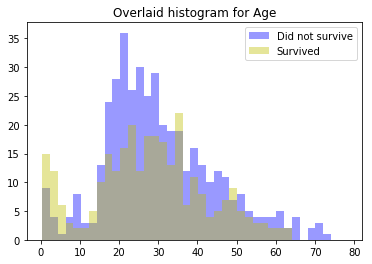

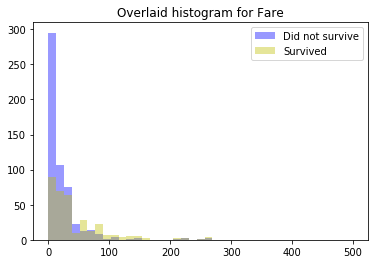

In [182]:
for i in ['Age','Fare']:
    died = list(titanic[titanic['Survived']==0][i].dropna())
    survived = list(titanic[titanic['Survived']==1][i].dropna())
    xmin = min(min(died),min(survived))
    xmax = max(max(died),max(survived))
    width = (xmax  - xmin) / 40
    sns.distplot(died, color = 'b', kde = False, bins=np.arange(xmin,xmax,width))
    sns.distplot(survived, color = 'y', kde = False, bins=np.arange(xmin,xmax,width))
    plt.legend(['Did not survive','Survived'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

## Same for Categorical features

<Figure size 432x288 with 0 Axes>

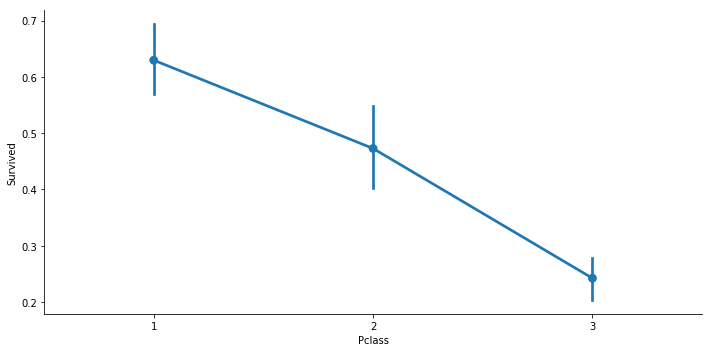

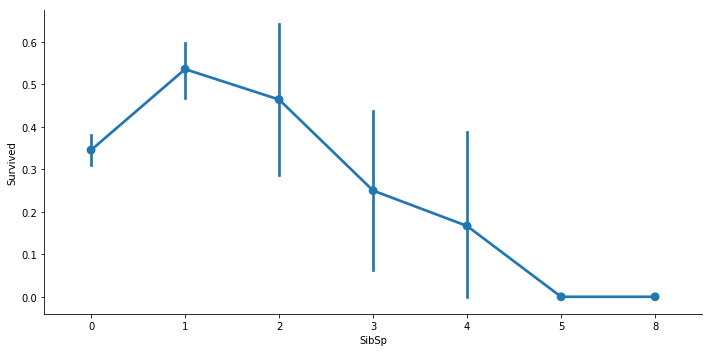

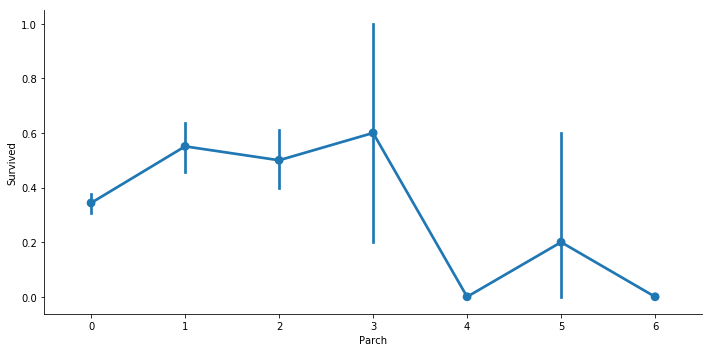

In [183]:
for i,col in enumerate(['Pclass','SibSp','Parch']):
    plt.figure(i)
    sns.catplot(x=col ,y= 'Survived',data=titanic ,kind='point' ,aspect=2,)

## Now here we observe that as the SibSp and Parch goes on increasing Survival chances are less .
## So we can combine these two features into one

In [184]:
titanic['family_cnt'] = titanic['SibSp']+titanic['Parch']

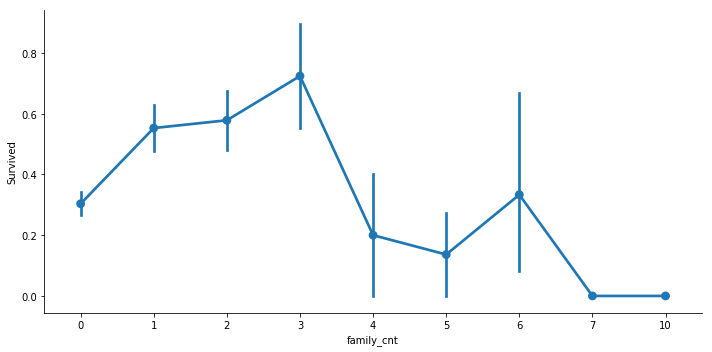

In [185]:
sns.catplot(x='family_cnt',y='Survived',data=titanic,kind='point',aspect=2,)

In [186]:
titanic.groupby(titanic['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,family_cnt
Age,,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.943978
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567,0.745763


## From the above data for Age missing values, we can't say for sure that the values missing are not random, so we consider them as random.
## So we are using very naive but useful method for filling these missing values i.e. the mean or average of all the values in that column
## So it satisfies the model by fitting a value in there, and by averaging the value its not biasing the model towards one or the another. In other words, since the value of age is average of all the values the model will try to use other features to decide whether the passenger survived or not

In [187]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

### Now whenever we can reduce the number of features by maintaining the meaning of those features we should do that

### Also when the model has various features with similar colinearity then model finds it difficult to assign values to those features and could have negetive effects on those also. so always drop the extra features or the features from which we hace created a new combined feature

In [188]:
titanic.drop(['SibSp','Parch'],axis =1, inplace=True)

In [189]:
titanic[cont_features].corr()

KeyError: "['SibSp' 'Parch'] not in index"

## Now we will be exploring Categorical features

In [191]:
titanic[Cat_features].head()

,Survived,Sex,Cabin,Pclass,Embarked
0,0,male,NaN,3,S
1,1,female,C85,1,C
2,1,female,NaN,3,S
3,1,female,C123,1,S
4,0,male,NaN,3,S


In [67]:
gen = {'male':0,'female':1}

In [69]:
titanic['Sex'] = titanic['Sex'].map(gen)

In [74]:
temp_df = pd.get_dummies(titanic['Embarked'])

In [89]:
titanic_df = titanic.join(temp_df)

In [90]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0,0


In [55]:
cont_features = ['Age','SibSp','Parch','Fare']

In [57]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
titanic['Survived'].groupby(titanic['Age'].isnull()).mean()

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

## Name, passenger and Ticket are irrelevant in determining whether passenger survived or not

In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
features = ['Name','Embarked', 'PassengerId','Embarked','Ticket','Cabin']

In [14]:
titanic.drop(features, axis=1, inplace=True)

In [15]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [19]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
titanic.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [22]:
titanic.groupby(titanic['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


In [44]:
for i in enumerate(['Pclass','Parch','SibSp']):
    print(i)

(0, 'Pclass')
(1, 'Parch')
(2, 'SibSp')


In [43]:
col

In [45]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
